# Algo Trading Pairs Trading Notebook


# What is Pairs Trading?

# Pairs Trading History

- Invented Around 1980s
- Gerry Bamberger and Nunzio Tartaglia
- Quantitative group at Morgan Stanley
- D.E. Shaw & Co. is famous for this strategy

# Introduction to Pairs Trading Strategy

- Pairs trading is a classic example of a strategy based on mathematical/statistical analysis. For this it is categorized Statistical Arbitrage because of the use of statistics in finding the arbitrage opportunity.

- The idea is to find 2 securities which move similairly. The approach is that there is some economic theory that is linking them together. For example, natural gas prices & oil prices. 

- Because you know the movement and dynamics between these two securities you can do what warren buffet does:

**BUY LOW**
**SELL HIGH**

- Because of the use of buying and selling, Pairs Trading is often referred to as a *market neutral strategy*. 

*Market Goes UP*
- You **Make money** off **Long position**
- You **Lose Money** off **Short Position**

*Market Goes DOWN* 
- You **make money** off **Short Position**
- You **lose money** off **Long Position**

Because of this, it is regarded as market neutral.

# Example


In [42]:
from IPython.display import Image
img = 'pic1.png'
Image(url=img)

In [43]:
from IPython.display import Image
img2 = 'pic2.png'
Image(url=img2)


# To test strategy Need 2 things

- An economic idea (link) between securities
- Way to see if it would work. 


## For the economic idea 

Many people in industry try to think of economic ideas that connect pairs. 
One can turn to economic formulas, creative ideas, or logical reasoning. 
For example, the most common example would be comparing companies that manufacture similair product. 


## Simplified example

Pepsi (PEP) and Coca Cola (KO) are different companies that create a similar product, soda pop. Historically, the two companies have shared similar dips and highs, depending on the soda pop market. If the price of Coca Cola were to go up a significant amount while Pepsi stayed the same, a pairs trader would buy Pepsi stock and sell Coca Cola stock, assuming that the two companies would later return to their historical balance point. If the price of Pepsi rose to close that gap in price, the trader would make money on the Pepsi stock, while if the price of Coca Cola fell, he would make money on having shorted the Coca Cola stock.

The reason for the deviated stock to come back to original value is itself an assumption. It is assumed that the pair will have similar business idea as in the past during the holding period of the stock.

## Potential Examples

Ex) Drinks
- Pepsi
- Coca Cola 

Ex) Banks
- Citibank
- Chase

Ex) Computing power
- Amazon
- MSFT

Ex) Commodities
- Gold
- Silver


## Examples of other potential pairs

- Domino's Pizza (DPZ) and Papa John's Pizza (PZZA)
- Wal-Mart (WMT) and Target Corporation (TGT)
- Exxon Mobil (XOM) and Chevron Corporation (CVX)


However, from time to time, there might be a divergence in the spread between these two pairs caused by temporary supply/demand changes, large buy/sell orders for one security, reaction for important news about one of the companies etc. In this scenario, one stock moves up while the other moves down relative to each other. *If you expect this divergence to revert back to normal with time, you can make a pairs trade.*

Therefore the name **pairs trading**, cause trading in pairs. 

When there is a temporary divergence, the pairs trade would be to sell the **outperforming** stock (the stock that moved up )and to buy the **underperforming** stock (the stock that moved down ). You are making a bet that the *spread* between the two stocks would eventually converge by either the **outperforming** stock moving back down or the **underperforming** stock moving back up or both — your trade will make money in all of these scenarios. If both the stocks move up or move down together without changing the spread between them, you don’t make or lose any money.

Hence, pairs trading is a market neutral trading strategy enabling traders to profit from virtually any market conditions: uptrend, downtrend, or sideways movement.


Again,the main point to the strategy is you test or reason a strong economic link that one can model using an equation. Because you boiled the economic link down to a mathematical model (or algorithm) that one can follow or make trades off of, you can implement it in algorithmic trading. 

# Way to measure similarity. 

The most popular method are

**Correlation**

**Cointegration**



In [46]:
img3 = 'pic3.png'
img4 = 'pic4.png'
Image(url=img3)


In [47]:
Image(url=img4)

# Quote

From Quantitative Trading by Ernie Chan :

"Correlation between two price series actually refers to the correlations of their returns over some time horizon (for concreteness, let's say a day). If two stocks are positively correlated, there is a good chance that their prices will move in the same direction most days. However, having a positive correlation does not say anything about the long-term behavior of the two stocks. In particular, it doesn't guarantee that the stock prices will not grow farther and farther apart in the long run even if they do move in the same direction most days. However, if two stocks were cointegrated and remain so in the future, their prices (weighted appropriately) will be unlikely to diverge. Yet their daily (or weekly, or any other time horizon) returns may be quite uncorrelated."



# Explaining the Concept

In [48]:
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
# just set the seed for the random number generator
np.random.seed(13)

import matplotlib.pyplot as plt

## Generating Two Fake Securities

We model X's daily returns by drawing from a normal distribution. 
Then we perform a cumulative sum to get the value of X on each day.
We perform the cumulative sum in our toy example to factor in the price movements from the other days.

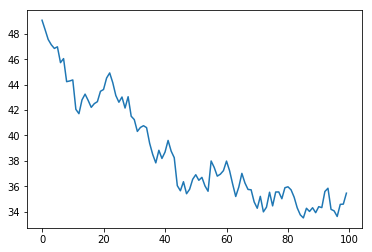

In [3]:
X_returns = np.random.normal(0, 1, 100) # Generate the daily returns
# sum them and shift all the prices up into a reasonable range
X = pd.Series(np.cumsum(X_returns), name='X') + 50
X.plot()

Now we generate Y. Remember that Y is supposed to have a deep economic link to X, so the price of Y should vary pretty similarly. We model this by taking X, shifting it up and adding some random noise drawn from a normal distribution.

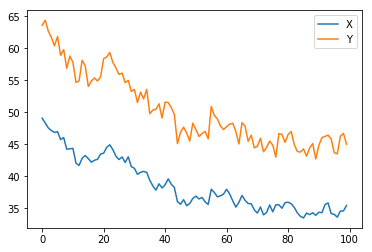

In [9]:
noise = np.random.normal(0, 1, 100)
Y = X*1.3 + noise
Y.name = 'Y'
pd.concat([X, Y], axis=1).plot();


We've constructed an example of two related series. 
Before we continue, we should really elaborate on correlation vs cointegration. 

Correlation shows how the directional movement of two series together. 

Cointegration, however is a more subtle relationship than correlation. 

Cointegration, implies that there is some sort of combination of one that leads to the other


## Correlation


### Correlation of 1

If you have something with correlation of one:
they move in the same direction


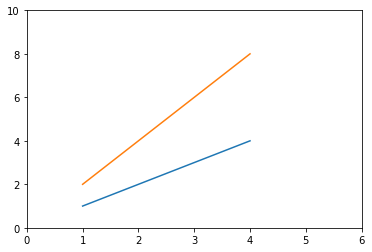

Correlation is:  1.0


In [5]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,2,3,4])
plt.plot([1,2,3,4], [2,4,6,8])

plt.axis([0, 6, 0, 10])
plt.show()
print("Correlation is: ", np.corrcoef([1,2,3,4], [2,4,6,8])[0][0])

### Correlation of 0

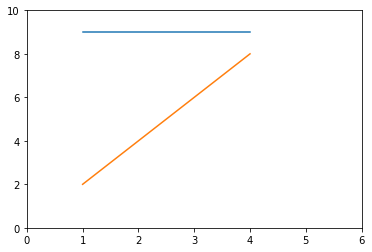

Correlation is: 0


In [6]:
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr   
plt.plot([1,2,3,4], [9,9,9,9])
plt.plot([1,2,3,4], [2,4,6,8])

plt.axis([0, 6, 0, 10])
plt.show()
print("Correlation is: 0")

### Correlation of -1


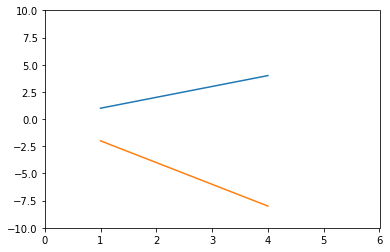

Correlation is:  -1.0


In [7]:
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr   
plt.plot([1,2,3,4], [1,2,3,4])
plt.plot([1,2,3,4], [-2,-4,-6,-8])

plt.axis([0, 6, -10, 10])
plt.show()
print("Correlation is: ", np.corrcoef([1,2,3,4], [-2,-4,-6,-8])[0][1])

# Cointegration

Cointegration, very similar to correlation, means that the ratio between two series will vary around a mean. The two series, Y and X follow the follwing:

Y = ⍺ X + e
where ⍺ is the constant ratio and e is white noise. 

For pairs trading to work between two timeseries, the expected value of the ratio over time must converge to the mean, i.e. they should be cointegrated.

The time series we constructed above are cointegrated. We’ll plot the ratio between the two now so we can see how this looks.


Cointegration is present if a linear combination of the two comes with it some mean reverting properties. See below for example

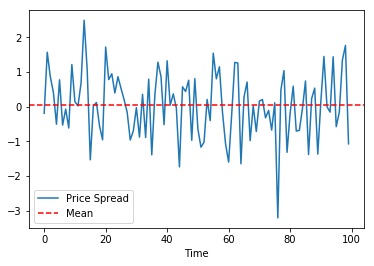

In [11]:
(Y - X*1.3).plot() # Plot the spread
plt.axhline((Y - X*1.3).mean(), color='red', linestyle='--') # Add the mean
plt.xlabel('Time')
plt.legend(['Price Spread', 'Mean']);

In [50]:
Image(url="pic5.png")

In [51]:
Image(url="pic6.png")

In [52]:
Image(url="pic7.png")

In [53]:
Image(url="pic8.png")

## Testing for Cointegration
That's an intuitive definition, but how do we test for this statistically? There is a convenient cointegration test that lives in `statsmodels.tsa.stattools`. Let's say that our confidence level is $0.05$. We should see a p-value below our cutoff, as we've artifically created two series that are the textbook definition of cointegration.

In [12]:
# compute the p-value of the cointegration test
# will inform us as to whether the spread between the 2 timeseries is stationary
# around its mean

import statsmodels.api as sm

model = sm.OLS(Y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
print(results.summary())

res = sm.OLS(Y, X).fit()
residuals = Y - res.predict()

from statsmodels.tsa.stattools import adfuller

result = adfuller(residuals)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.853e+05
Date:                Thu, 17 May 2018   Prob (F-statistic):          4.41e-173
Time:                        14:26:05   Log-Likelihood:                -136.00
No. Observations:                 100   AIC:                             274.0
Df Residuals:                      99   BIC:                             276.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              1.3017      0.002    534.112      0.0

### Correlation vs. Cointegration
Correlation and cointegration, while theoretically similar, are not the same. To demonstrate this, we'll show examples of series that are correlated, but not cointegrated, and vice versa. To start let's check the correlation of the series we just generated.

In [254]:
X.corr(Y)

0.9490453479463373

That's very high, as we would expect. But how would two series that are correlated but not cointegrated look? 

### Correlation Without Cointegration
A simple example is two series that just diverge.

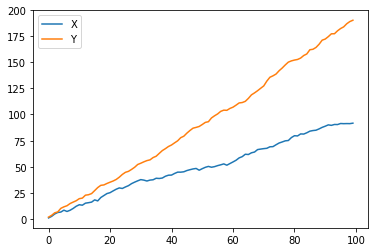

In [13]:
X_returns = np.random.normal(1, 1, 100)
Y_returns = np.random.normal(2, 1, 100)

X_diverging = pd.Series(np.cumsum(X_returns), name='X')
Y_diverging = pd.Series(np.cumsum(Y_returns), name='Y')

pd.concat([X_diverging, Y_diverging], axis=1).plot();

In [14]:
import pandas
print ('Correlation: ' + str(np.corrcoef(X_diverging, Y_diverging)[0,1]))
score, pvalue, _ = coint(X_diverging,Y_diverging)
print ('Cointegration test p-value: ' + str(pvalue))

Correlation: 0.9943138355869805
Cointegration test p-value: 0.4198662943700402


### Cointegration Without Correlation
A simple example of this case is a normally distributed series and a square wave.

In [15]:
Y2 = pd.Series(np.random.normal(0, 1, 1000), name='Y2') + 20
Y3 = Y2.copy()

In [16]:
# Y2 = Y2 + 10
Y3[0:100] = 30
Y3[100:200] = 10
Y3[200:300] = 30
Y3[300:400] = 10
Y3[400:500] = 30
Y3[500:600] = 10
Y3[600:700] = 30
Y3[700:800] = 10
Y3[800:900] = 30
Y3[900:1000] = 10

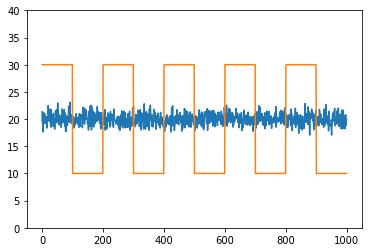

In [17]:
Y2.plot()
Y3.plot()
plt.ylim([0, 40]);

In [18]:
# correlation is nearly zero
print ('Correlation: ' + str(Y2.corr(Y3)))
score, pvalue, _ = coint(Y2,Y3)
print ('Cointegration test p-value: ' + str(pvalue))

Correlation: -0.059140506243574247
Cointegration test p-value: 1.0440444537453944e-06


Sure enough, the correlation is incredibly low, but the p-value shows that these are cointegrated.

## Hedging
Because you'd like to protect yourself from bad markets, often times short sales will be used to hedge long investments. Because a short sale makes money if the security sold loses value, and a long purchase will make money if a security gains value, one can long parts of the market and short others. That way if the entire market falls off a cliff, we'll still make money on the shorted securities and hopefully break even. In the case of two securities we'll call it a hedged position when we are long on one security and short on the other.

## The Trick: Where it all comes together
Because the securities drift towards and apart from each other, there will be times when the distance is high and times when the distance is low. The trick of pairs trading comes from maintaining a hedged position across X and Y. If both securities go down, we neither make nor lose money, and likewise if both go up. We make money on the spread of the two reverting to the mean. In order to do this we'll watch for when X and Y are far apart, then short Y and long X. Similarly we'll watch for when they're close together, and long Y and short X.

### Going Long the Spread
This is when the spread is small and we expect it to become larger. We place a bet on this by longing Y and shorting X.

### Going Short the Spread
This is when the spread is large and we expect it to become smaller. We place a bet on this by shorting Y and longing X.


## Finding real securities that behave like this
The best way to do this is to start with securities you suspect may be cointegrated and perform a statistical test. If you just run statistical tests over all pairs, that would require a lot of computational power. 

The methods for finding viable pairs all live on a spectrum. At one end there is the formation of an economic hypothesis for an individual pair. You have some extra knowledge about an economic link that leads you to believe that the pair is cointegrated, so you go out and test for the presence of cointegration. In this case you will incur no multiple comparisons bias. At the other end of the spectrum, you perform a search through hundreds of different securities for any viable pairs according to your test. 


In [25]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return (score_matrix, pvalue_matrix, pairs)

## Looking for Cointegrated Pairs of Alternative Energy Securities
We are looking through a set of solar company stocks to see if any of them are cointegrated. We'll start by defining the list of securities we want to look through. Then we'll get the pricing data for each security for the year of 2014.

 We have formulated an economic hypothesis that there is some sort of link between a subset of securities within the energy sector and we want to test whether there are any cointegrated pairs. This incurs significantly less multiple comparisons bias than searching through hundreds of securities and slightly more than forming a hypothesis for an individual test.

NOTE: We include the market in our data. This is because the market drives the movement of so many securities that you often times might find two seemingingly cointegrated securities, but in reality they are not cointegrated and just both conintegrated with the market. This is known as a confounding variable and it is important to check for market involvement in any relationship you find.

In [36]:
#from backtester.dataSource.yahoo_data_source import YahooStockDataSource
#from datetime import datetime


startDateStr = '2007/12/01'
endDateStr = '2017/12/01'
cachedFolderName = 'yahooData/'
dataSetId = 'testPairsTrading'
instrumentIds = ['SPY','AAPL','ADBE','SYMC','EBAY','MSFT','QCOM',
                 'HPQ','JNPR','AMD','IBM']
#ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            #dataSetId=dataSetId,
                            #instrumentIds=instrumentIds,
                            #startDateStr=startDateStr,
                           # endDateStr=endDateStr,
                           # event='history')
#data = ds.getBookDataByFeature()['Adj Close']

#symbol_list = ['ABGB', 'ASTI', 'CSUN', 'DQ', 'FSLR','SPY']
#prices_df = get_pricing(symbol_list, fields=['price']
#                               , start_date='2014-01-01', end_date='2015-01-01')['price']
#prices_df.columns = map(lambda x: x.symbol, prices_df.columns)

Example of how to get all the prices of all the stocks loaded using get_pricing() above in one pandas dataframe object

In [15]:
prices_df.head()

,ABGB,ASTI,CSUN,DQ,FSLR,SPY
2014-01-02 00:00:00+00:00,14.099,7.41,7.040,38.00,57.43,179.444
2014-01-03 00:00:00+00:00,14.427,7.25,7.078,39.50,56.74,179.287
2014-01-06 00:00:00+00:00,14.989,7.12,7.010,40.05,51.26,178.905
2014-01-07 00:00:00+00:00,15.282,7.20,6.960,41.93,52.48,179.934
2014-01-08 00:00:00+00:00,14.969,7.10,7.160,42.49,51.68,180.023


In [16]:
prices_df['SPY'].head()

2014-01-02 00:00:00+00:00    179.444
2014-01-03 00:00:00+00:00    179.287
2014-01-06 00:00:00+00:00    178.905
2014-01-07 00:00:00+00:00    179.934
2014-01-08 00:00:00+00:00    180.023
Freq: C, Name: SPY, dtype: float64

Now we'll run our method on the list and see if any pairs are cointegrated.

[(u'ABGB', u'FSLR')]


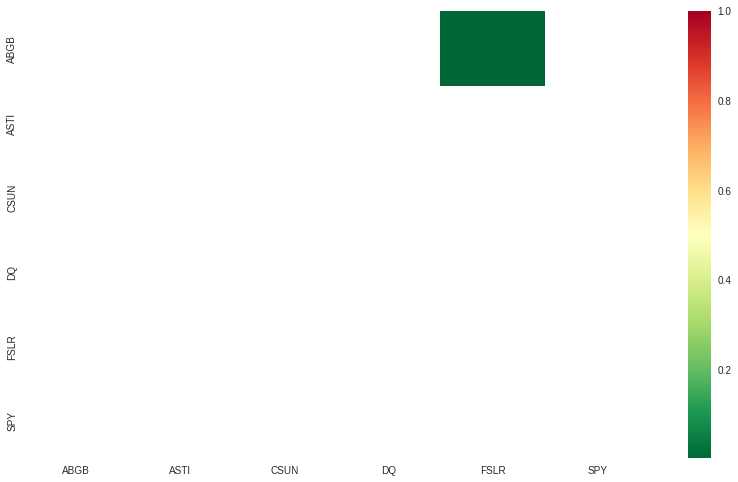

In [17]:
# Heatmap to show the p-values of the cointegration test between each pair of
# stocks. Only show the value in the upper-diagonal of the heatmap
scores, pvalues, pairs = find_cointegrated_pairs(prices_df)
import seaborn
seaborn.heatmap(pvalues, xticklabels=symbol_list, yticklabels=symbol_list, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )
print pairs

Looks like 'ABGB' and 'FSLR' are cointegrated. Let's take a look at the prices to make sure there's nothing weird going on.

In [18]:
S1 = prices_df['ABGB']
S2 = prices_df['FSLR']

In [19]:
score, pvalue, _ = coint(S1, S2)
pvalue

0.0049511108325587683

## Calculating the Spread
Now we will plot the spread of the two series. In order to actually calculate the spread, we use a linear regression to get the coefficient for the linear combination to construct between our two securities, as shown in the [stationarity lecture](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity). Using a linear regression to estimate the coefficient is known as the Engle-Granger method.

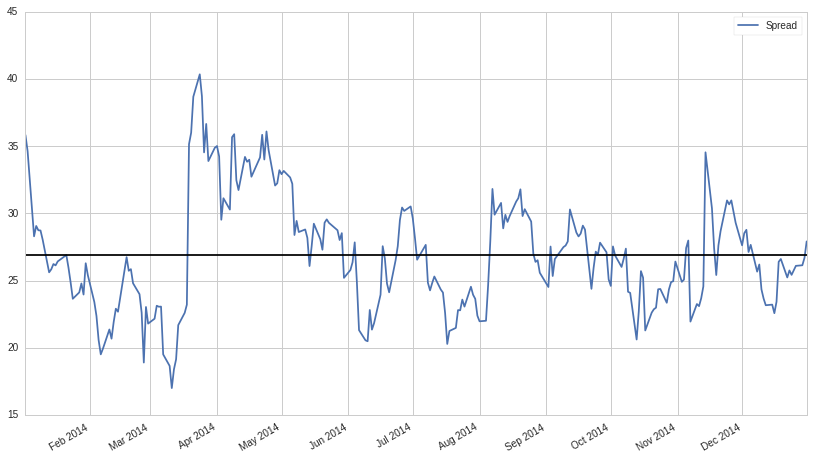

In [20]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['ABGB']
b = results.params['ABGB']

spread = S2 - b * S1
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);

Alternatively, we could examine the ratio betwen the two series.

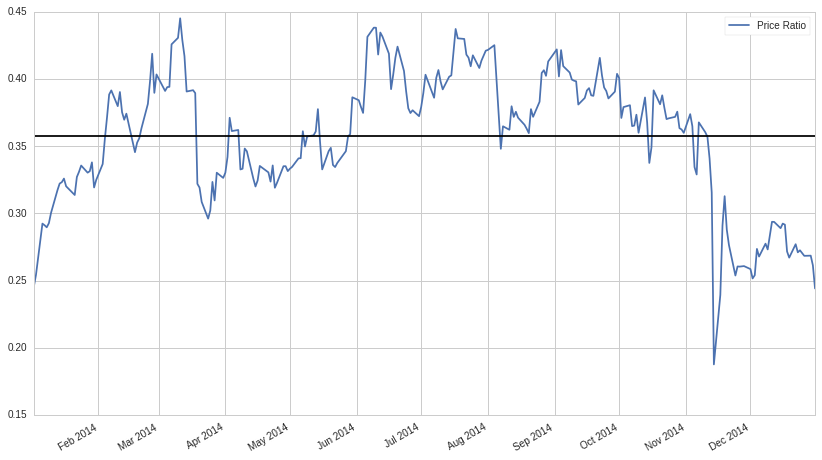

In [21]:
ratio = S1/S2
ratio.plot()
plt.axhline(ratio.mean(), color='black')
plt.legend(['Price Ratio']);

Examining the price ratio of a trading pair is a traditional way to handle pairs trading. Part of why this works as a signal is based in our assumptions of how stock prices move, specifically because stock prices are typically assumed to be log-normally distributed. What this implies is that by taking a ratio of the prices, we are taking a linear combination of the returns associated with them (since prices are just the exponentiated returns).

This can be a little irritating to deal with for our purposes as purchasing the precisely correct ratio of a trading pair may not be practical. We choose instead to move forward with simply calculating the spread between the cointegrated stocks using linear regression. This is a very simple way to handle the relationship, however, and is likely not feasible for non-toy examples. There are other potential methods for estimating the spread listed at the bottom of this lecture. If you want to get more into the theory of why having cointegrated stocks matters for pairs trading, again, please see the Integration, Cointegration, and Stationarity Lecture from the [Quantopian Lecture Series](https://www.quantopian.com/lectures#Integration,-Cointegration,-and-Stationarity).

So, back to our example. The absolute spread isn't very useful in statistical terms. It is more helpful to normalize our signal by treating it as a z-score. 

### WARNING
In practice this is usually done to try to give some scale to the data, but this assumes some underlying distribution, usually a normal distribution. Under a normal distribution, we would know that approximately 84% of all spread values will be smaller. However, much financial data is not normally distributed, and one must be very careful not to assume normality, nor any specific distribution when generating statistics. It could be the case that the true distribution of spreads was very fat-tailed and prone to extreme values. This could mess up our model and result in large losses.

In [22]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

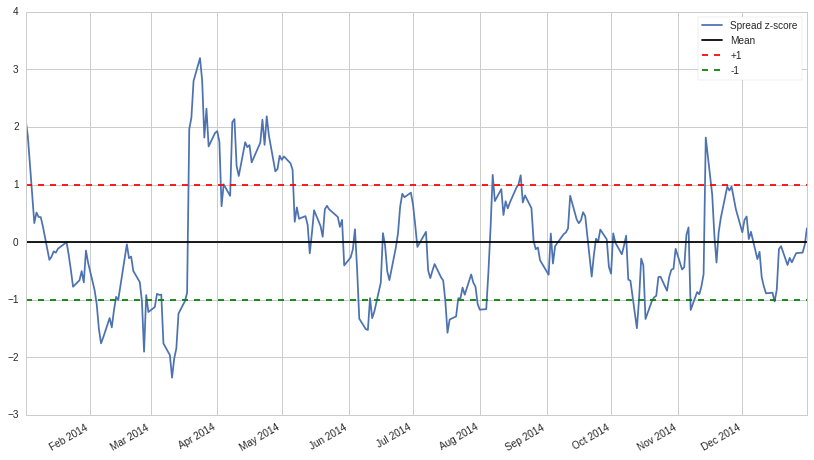

In [23]:
zscore(spread).plot()
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

### Simple Strategy:
* Go "Long" the spread whenever the z-score is below -1.0
* Go "Short" the spread when the z-score is above 1.0
* Exit positions when the z-score approaches zero

## Trading using constantly updating statistics
In general taking a statistic over your whole sample size can be bad. For example, if the market is moving up, and both securities with it, then your average price over the last 3 years may not be representative of today. For this reason traders often use statistics that rely on rolling windows of the most recent data. You might want to use smoothed out prices instead

## Moving Averages
A moving average is just an average over the last $n$ datapoints for each given time. It will be undefined for the first $n$ datapoints in our series. Shorter moving averages will be more jumpy and less reliable, but respond to new information quickly. Longer moving averages will be smoother, but take more time to incorporate new information.

We also need to use a rolling beta, a rolling estimate of how our spread should be calculated, in order to keep all of our parameters up to date.

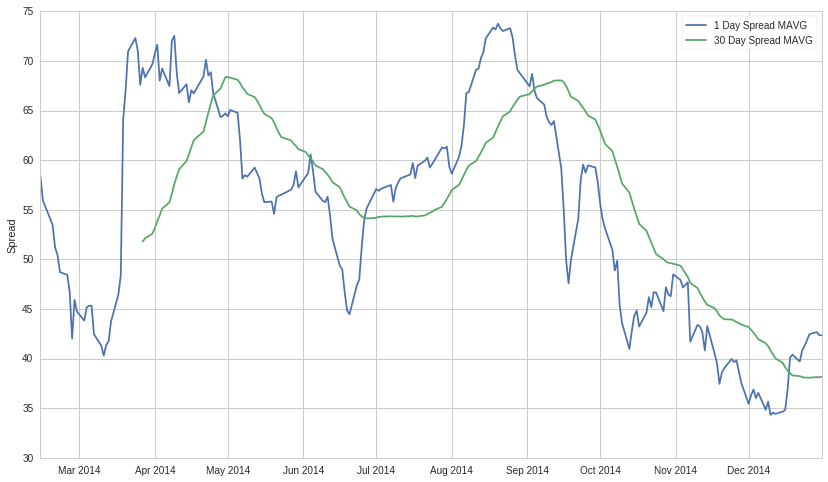

In [24]:
# Get the spread between the 2 stocks
# Calculate rolling beta coefficient
rolling_beta = pd.ols(y=S1, x=S2, window_type='rolling', window=30)
spread = S2 - rolling_beta.beta['x'] * S1
spread.name = 'spread'

# Get the 1 day moving average of the price spread
spread_mavg1 = pd.rolling_mean(spread, window=1)
spread_mavg1.name = 'spread 1d mavg'

# Get the 30 day moving average
spread_mavg30 = pd.rolling_mean(spread, window=30)
spread_mavg30.name = 'spread 30d mavg'

plt.plot(spread_mavg1.index, spread_mavg1.values)
plt.plot(spread_mavg30.index, spread_mavg30.values)

plt.legend(['1 Day Spread MAVG', '30 Day Spread MAVG'])

plt.ylabel('Spread');

We can use the moving averages to compute the z-score of the spread at each given time. This will tell us how extreme the spread is and whether it's a good idea to enter a position at this time. Let's take a look at the z-score now.

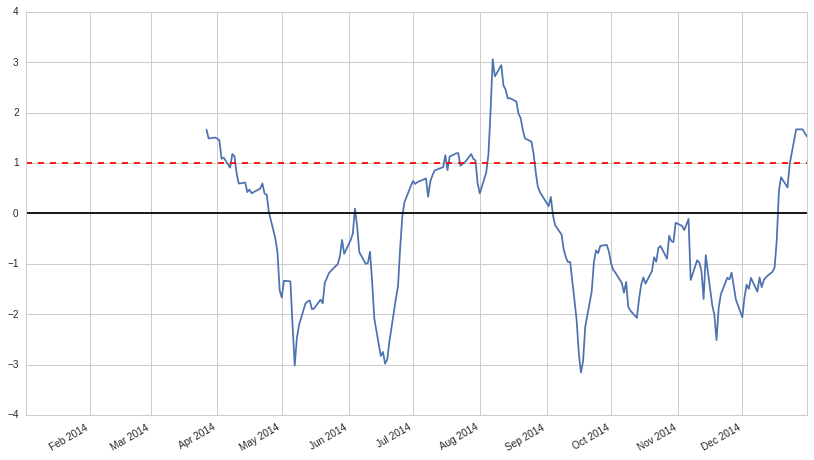

In [25]:
# Take a rolling 30 day standard deviation
std_30 = pd.rolling_std(spread, window=30)
std_30.name = 'std 30d'

# Compute the z score for each day
zscore_30_1 = (spread_mavg1 - spread_mavg30)/std_30
zscore_30_1.name = 'z-score'
zscore_30_1.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--');

The z-score doesn't mean much out of context, let's plot it next to the prices to get an idea of what it looks like. We'll take the negative of the z-score because the spreads were all negative and that is a little counterintuitive to trade on.

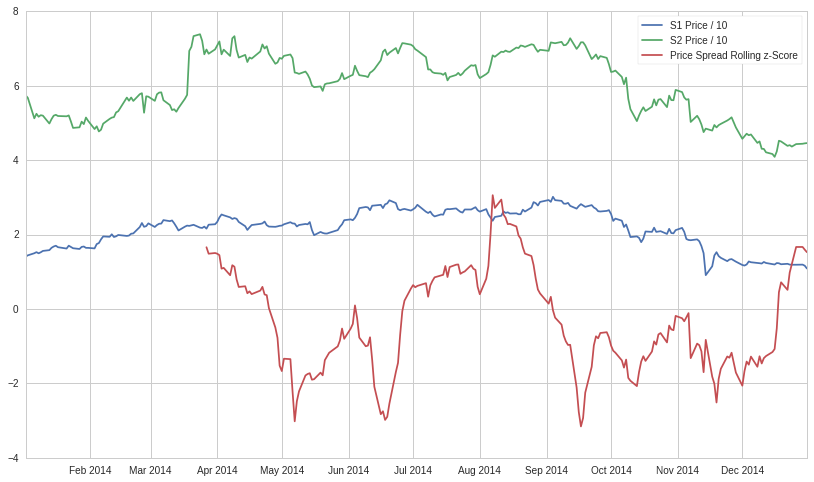

In [26]:
# Plot the prices scaled down along with the negative z-score
# just divide the stock prices by 10 to make viewing it on the plot easier
plt.plot(S1.index, S1.values/10)
plt.plot(S2.index, S2.values/10)
plt.plot(zscore_30_1.index, zscore_30_1.values)
plt.legend(['S1 Price / 10', 'S2 Price / 10', 'Price Spread Rolling z-Score']);

## Out of Sample Test
Now that we have constructed our spread appropriately and have an idea of how we will go about making trades, it is time to conduct some out of sample testing. Our whole model is based on the premise that these securities are cointegrated, but we built it on information from a certain time period. If we actually want to implement this model, we need to conduct an out of sample test to confirm that the principles of our model are still valid going forward.

Since we initially built the model on the 2014 - 2015 year, let's see if this cointegrated relationship holds for 2015 - 2016. Historical results do not guarantee future results so this is a sanity check to see if the work we have done holds strong.

In [27]:
symbol_list = ['ABGB', 'FSLR']
prices_df = get_pricing(symbol_list, fields=['price']
                               , start_date='2015-01-01', end_date='2016-01-01')['price']
prices_df.columns = map(lambda x: x.symbol, prices_df.columns)

In [28]:
S1 = prices_df['ABGB']
S2 = prices_df['FSLR']

In [29]:
score, pvalue, _ = coint(S1, S2)
print 'p-value: ', pvalue

p-value:  0.991161185763


Unfortunately, since our p-value is above the cutoff of $0.05$, we conclude that our model will no longer be valid due to the lack of cointegration between our chosen securities. If we tried to deploy this model without the underlying assumptions holding, we would have no reason to believe that it would actually work. Out of sample testing is a vital step to make sure that our work will actually be viable in the market.

## Implementation
When actually implementing a pairs trading strategy you would normally want to be trading many different pairs at once. If you find a good pair relationship by analyzing data, there is no guarantee that that relationship will continue into the future. Trading many different pairs creates a diversified portfolio to mitigate the risk of individual pairs "falling out of" cointegration.

There is a template [algorithm](https://www.quantopian.com/lectures/example-basic-pairs-trading-algorithm) attached to this lecture that shows an example of how you would implement pairs trading on our platform. Feel free to check it out and modify it with your own pairs to see if you can improve it.

(this is *not* an endorsement) But, a very good practical resource for learning more about pair trading is Dr. Ernie Chan's book:  Algorithmic Trading: Winning Strategies and Their Rationale

# Go To R for trading game